# Reporte: MS - "Data Mining & Processing"
### *Li Yang, Patiy*

El presente reporte y procesamiento de datos se llevó a cabo en lenguaje Python en un cuaderno en Jupyter Notebook que se encuentra publicado en [este repositorio en Github](https://github.com/Lab-Instrumental-2023-2/MS-DataMining-Processing). Alternativamente, este reporte también puede ser visualizado directamente y con mayor facilidad en esta [página web](https://lab-instrumental-2023-2.github.io/MS-DataMining-Processing/) creada a partir del mismo repositorio.

## Contenido del reporte
- **a) Determina y justifica cuáles son las señales que pueden categorizadas como ruido.**
    - **a.1) ANOVA unidireccional en poblaciones de blancos**
        - a.1.1) Transformación logarítmica de los datos
        - a.1.2) Ensayos evaluados con ANOVA unidireccional
        - a.1.3) Validación de la hipótesis nula ($𝐻_0$)
        - a.1.4) Interpretación de los resultados
        - a.1.5) Blancos significativos
    - **a.2) Identificación de las señales categorizadas como ruido**
        - a.2.2) Resta de las intensidades con el promedio de los blancos significativos
        - a.2.3) Identificación de señales
        - a.2.4) Filtro de señales en la muestras que no se encuentran en MM_X1, ni MM_X2
        - a.2.5) Verificación de la reproducibilidad de las señales mediante pruebas t-student
        - a.2.6) Señales consideradas como ruido
        
- **b) ¿Cuáles son las señales comunes para ambas muestras de Pisco?**

- **c) ¿Qué señales funcionan como marcadores para la identificación de las muestras de Pisco?**
    - **c.1) ANOVA unidireccional en poblaciones de muestras de Pisco y MM**
        - c.1.1) Transformación logarítmica de los datos
        - c.1.2) Ensayos evaluados con ANOVA unidireccional
        - c.1.3) Identificación de señales propias de cada Pisco
    - **c.2) PCA con las señales identificadas como propias de cada Pisco**
- **d) ¿Qué parámetros y consideraciones tuvo que tomar para poder responder las preguntas “a”, “b”, y “c”?**


In [1632]:
import pandas as pd
data = pd.read_excel("https://github.com/Lab-Instrumental-2023-2/MS-DataMining-Processing/raw/main/Data.xlsx")
data = data.set_index(['Alignment ID'])
data

# DataFrame con los datos provistos:
#==================================

,Blank_11,Blank_12,Blank_21,Blank_22,Blank_31,Blank_Column,Alcanes_1,Alcanes_3,MM_Std_X1,MM_Std_X2,MM_X1,MM_X2,Italia_12,Italia_21,Italia_32,Quebranta_11,Quebranta_22
Alignment ID,,,,,,,,,,,,,,,,,
0,5.812149e-06,5.812149e-06,5.812149e-06,0.000006,5.812149e-06,5.812149e-06,0.001114,0.000389,0.000058,0.000094,3.734537e-04,5.241841e-04,0.001451,1.068961e-03,0.001129,0.000083,3.682379e-04
1,1.299572e-04,1.299572e-04,1.299572e-04,0.000130,1.299572e-04,4.532368e-02,0.000130,0.001300,0.000130,0.000130,1.299572e-04,1.299572e-04,0.000130,6.007807e-03,0.022183,0.000130,3.123167e-03
2,4.669645e-06,4.669645e-06,4.669645e-06,0.000005,4.669645e-06,4.669645e-06,0.000584,0.000648,0.000047,0.000073,3.439705e-03,4.173059e-03,0.017437,9.088211e-03,0.016529,0.000651,2.155563e-03
3,3.579123e-06,3.579123e-06,3.579123e-06,0.000004,3.579123e-06,3.579123e-06,0.000812,0.001726,0.000036,0.000058,4.740539e-03,5.432122e-03,0.033245,1.530614e-02,0.000726,0.000293,3.579123e-06
4,2.226109e-03,2.131481e-03,2.519395e-03,0.002461,2.192135e-03,8.887741e-04,0.000054,0.000073,0.000067,0.000095,1.006047e-02,1.050701e-02,0.065939,3.792160e-02,0.007081,0.000501,2.458184e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,3.920250e-07,3.920250e-07,3.920250e-07,0.004448,3.162425e-03,1.826925e-03,0.009431,0.000063,0.000004,0.000011,3.055530e-04,2.435014e-04,0.001776,3.920250e-07,0.000599,0.000582,4.289580e-04
75,3.530390e-07,3.530390e-07,3.530390e-07,0.002723,3.530390e-07,1.686392e-03,0.006788,0.000099,0.000004,0.000005,3.530390e-07,3.530390e-07,0.000825,3.530390e-07,0.000592,0.000322,3.530390e-07
76,6.317910e-03,8.377904e-03,6.968740e-03,0.003940,2.803058e-03,4.322329e-03,0.001578,0.000384,0.000019,0.000009,4.395675e-04,7.596660e-04,0.001964,1.615682e-03,0.002565,0.000533,9.862117e-04


# a) Determina y justifica cuáles son las señales que pueden categorizadas como ruido. 
Para identificar las señales que pueden ser categorizadas como ruido, se realizó un ANOVA unidireccional (*one-way* ANOVA) en ensayos con diferentes poblaciones de blancos a fin de determinar cuáles se considerarían como blancos significativos. Luego de esto, se consideraron como ruido aquellas señales cuya intensidad era menor a tres veces la desviación estándar de las señales de los blancos significativos. A continuación, se detallan los análisis realizados:

# a.1) ANOVA unidireccional en poblaciones de blancos

Se realizó un ANOVA unidireccional con la finalidad de evaluar si existen diferencias significativas en las medias de poblaciones de blancos. Se optó por un análisis unidireccional, porque la única variable independiente a analizar es la intensidad de la señal del blanco y, antes de proceder con el análisis, se realizó una transformación de los datos aplicándoles la función logaritmo en base 10. Se escogió dicha transformación, porque las señales de los blancos presentan valores no nulos y el motivo fue asegurar que se cumplan las asunciones de ANOVA de que los residuos (diferencias entre señales de grupos entre la media) sigan una distribución normal y el nivel de varianza entre cada grupo a analizar sea aproximadamente igual [[1]](https://dzchilds.github.io/stats-for-bio/data-transformations.html).

## a.1.1) Transformación logarítmica de los datos

In [1633]:
# DataFrame con los blancos
blancos = data.iloc[:,range(0,6)]

# DataFrame con log10(blancos)
import numpy as np
log10blancos = blancos.apply(lambda x: np.log10(x)) 
nombres = {blanco:"log10("+str(blanco)+")" for blanco in blancos.columns}
log10blancos = log10blancos.rename(columns = nombres)

log10blancos.iloc[:,range(0,5)]

,log10(Blank_11),log10(Blank_12),log10(Blank_21),log10(Blank_22),log10(Blank_31)
Alignment ID,,,,,
0,-5.235663,-5.235663,-5.235663,-5.235663,-5.235663
1,-3.886200,-3.886200,-3.886200,-3.886200,-3.886200
2,-5.330716,-5.330716,-5.330716,-5.330716,-5.330716
3,-5.446223,-5.446223,-5.446223,-5.446223,-5.446223
4,-2.652454,-2.671319,-2.598704,-2.608967,-2.659133
...,...,...,...,...,...
74,-6.406686,-6.406686,-6.406686,-2.351874,-2.499980
75,-6.452177,-6.452177,-6.452177,-2.565004,-6.452177
76,-2.199427,-2.076865,-2.156846,-2.404474,-2.552368


## a.1.2) Ensayos evaluados con ANOVA unidireccional
Se evaluaron ensayos con la condición de que cada uno debe contar con un mínimo de dos poblaciones con dos réplicas distintas. Con esto, se analizaron las únicas cuatro combinaciones que cumplían con estos requerimientos base.

#### Ensayo 1 
   - Población 1: log10(Blank_11) y log10(Blank_12) 
   - Población 2: log10(Blank_21) y log10(Blank_22)    
   - Población 3: log10(Blank_31)
   - Población 4: log10(Blank_Column)

#### Ensayo 2
   - Población 1: log10(Blank_11) y log10(Blank_12)
   - Población 2: log10(Blank_21) y log10(Blank_22)
   - Población 3: log10(Blank_31)

#### Ensayo 3 
   - Población 1: log10(Blank_11) y log10(Blank_12)
   - Población 2: log10(Blank_21) y log10(Blank_22)
   - Población 3: log10(Blank_Column)

#### Ensayo 4 
   - Población 1: log10(Blank_11) y log10(Blank_12)
   - Población 2: log10(Blank_21) y log10(Blank_22)

**Notas**: El primer subíndice del blanco se refiere al grupo que realizó la medición y el segunfo, al SPME empleado. El blanco de columna corresponde a la medición sin solvente, ni SPME.

In [1634]:
#Ensayo 1
Anova_E1=log10blancos.transpose()
Anova_E1.insert(loc=0, column="Población", value=['P1','P1','P2','P2','P3','P4'])
Anova_E1

#DataFrame con las poblaciones para el ensayo 1:
#===============================================

Alignment ID,Población,0,1,2,3,4,5,6,7,8,...,69,70,71,72,73,74,75,76,77,78
log10(Blank_11),P1,-5.235663,-3.886200,-5.330716,-5.446223,-2.652454,-1.693412,-6.45485,-3.800643,-5.071578,...,-1.691824,-2.494666,-1.871896,-2.480518,-1.448463,-6.406686,-6.452177,-2.199427,-6.441648,-2.379177
log10(Blank_12),P1,-5.235663,-3.886200,-5.330716,-5.446223,-2.671319,-1.904369,-6.45485,-3.800643,-5.071578,...,-1.686458,-2.497916,-1.839638,-2.321825,-1.468457,-6.406686,-6.452177,-2.076865,-6.441648,-2.380460
log10(Blank_21),P2,-5.235663,-3.886200,-5.330716,-5.446223,-2.598704,-1.712959,-6.45485,-3.800643,-5.071578,...,-1.723752,-2.506076,-1.761401,-2.446762,-1.515174,-6.406686,-6.452177,-2.156846,-6.441648,-2.463241
log10(Blank_22),P2,-5.235663,-3.886200,-5.330716,-5.446223,-2.608967,-1.516075,-6.45485,-3.800643,-5.071578,...,-1.681925,-2.559642,-1.797318,-2.294709,-1.579402,-2.351874,-2.565004,-2.404474,-2.592853,-2.556986
log10(Blank_31),P3,-5.235663,-3.886200,-5.330716,-5.446223,-2.659133,-1.062626,-6.45485,-3.800643,-5.071578,...,-1.731392,-2.509964,-2.011894,-2.475980,-1.549455,-2.499980,-6.452177,-2.552368,-2.560801,-2.368915
log10(Blank_Column),P4,-5.235663,-1.343675,-5.330716,-5.446223,-3.051209,-2.909880,-6.45485,-1.378085,-5.071578,...,-1.681565,-2.527773,-1.955786,-2.331934,-1.536139,-2.738279,-2.773041,-2.364282,-6.441648,-2.876356


In [1635]:
#Ensayo 2
Anova_E2=log10blancos.iloc[:,[0,1,2,3,4]].transpose()
Anova_E2.insert(loc=0, column="Población", value=['P1','P1','P2','P2','P3'])
Anova_E2

#DataFrame con las poblaciones para el ensayo 2:
#===============================================

Alignment ID,Población,0,1,2,3,4,5,6,7,8,...,69,70,71,72,73,74,75,76,77,78
log10(Blank_11),P1,-5.235663,-3.8862,-5.330716,-5.446223,-2.652454,-1.693412,-6.45485,-3.800643,-5.071578,...,-1.691824,-2.494666,-1.871896,-2.480518,-1.448463,-6.406686,-6.452177,-2.199427,-6.441648,-2.379177
log10(Blank_12),P1,-5.235663,-3.8862,-5.330716,-5.446223,-2.671319,-1.904369,-6.45485,-3.800643,-5.071578,...,-1.686458,-2.497916,-1.839638,-2.321825,-1.468457,-6.406686,-6.452177,-2.076865,-6.441648,-2.380460
log10(Blank_21),P2,-5.235663,-3.8862,-5.330716,-5.446223,-2.598704,-1.712959,-6.45485,-3.800643,-5.071578,...,-1.723752,-2.506076,-1.761401,-2.446762,-1.515174,-6.406686,-6.452177,-2.156846,-6.441648,-2.463241
log10(Blank_22),P2,-5.235663,-3.8862,-5.330716,-5.446223,-2.608967,-1.516075,-6.45485,-3.800643,-5.071578,...,-1.681925,-2.559642,-1.797318,-2.294709,-1.579402,-2.351874,-2.565004,-2.404474,-2.592853,-2.556986
log10(Blank_31),P3,-5.235663,-3.8862,-5.330716,-5.446223,-2.659133,-1.062626,-6.45485,-3.800643,-5.071578,...,-1.731392,-2.509964,-2.011894,-2.475980,-1.549455,-2.499980,-6.452177,-2.552368,-2.560801,-2.368915


In [1636]:
#Ensayo 3
Anova_E3=log10blancos.iloc[:,[0,1,2,3,5]].transpose()
Anova_E3.insert(loc=0, column="Población", value=['P1','P1','P2','P2','P3'])
Anova_E3

#DataFrame con las poblaciones para el ensayo 3:
#===============================================

Alignment ID,Población,0,1,2,3,4,5,6,7,8,...,69,70,71,72,73,74,75,76,77,78
log10(Blank_11),P1,-5.235663,-3.886200,-5.330716,-5.446223,-2.652454,-1.693412,-6.45485,-3.800643,-5.071578,...,-1.691824,-2.494666,-1.871896,-2.480518,-1.448463,-6.406686,-6.452177,-2.199427,-6.441648,-2.379177
log10(Blank_12),P1,-5.235663,-3.886200,-5.330716,-5.446223,-2.671319,-1.904369,-6.45485,-3.800643,-5.071578,...,-1.686458,-2.497916,-1.839638,-2.321825,-1.468457,-6.406686,-6.452177,-2.076865,-6.441648,-2.380460
log10(Blank_21),P2,-5.235663,-3.886200,-5.330716,-5.446223,-2.598704,-1.712959,-6.45485,-3.800643,-5.071578,...,-1.723752,-2.506076,-1.761401,-2.446762,-1.515174,-6.406686,-6.452177,-2.156846,-6.441648,-2.463241
log10(Blank_22),P2,-5.235663,-3.886200,-5.330716,-5.446223,-2.608967,-1.516075,-6.45485,-3.800643,-5.071578,...,-1.681925,-2.559642,-1.797318,-2.294709,-1.579402,-2.351874,-2.565004,-2.404474,-2.592853,-2.556986
log10(Blank_Column),P3,-5.235663,-1.343675,-5.330716,-5.446223,-3.051209,-2.909880,-6.45485,-1.378085,-5.071578,...,-1.681565,-2.527773,-1.955786,-2.331934,-1.536139,-2.738279,-2.773041,-2.364282,-6.441648,-2.876356


In [1637]:
#Ensayo 4
Anova_E4=log10blancos.iloc[:,[0,1,2,3]].transpose()
Anova_E4.insert(loc=0, column="Población", value=['P1','P1','P2','P2'])
Anova_E4

#DataFrame con las poblaciones para el ensayo 4:
#===============================================

Alignment ID,Población,0,1,2,3,4,5,6,7,8,...,69,70,71,72,73,74,75,76,77,78
log10(Blank_11),P1,-5.235663,-3.8862,-5.330716,-5.446223,-2.652454,-1.693412,-6.45485,-3.800643,-5.071578,...,-1.691824,-2.494666,-1.871896,-2.480518,-1.448463,-6.406686,-6.452177,-2.199427,-6.441648,-2.379177
log10(Blank_12),P1,-5.235663,-3.8862,-5.330716,-5.446223,-2.671319,-1.904369,-6.45485,-3.800643,-5.071578,...,-1.686458,-2.497916,-1.839638,-2.321825,-1.468457,-6.406686,-6.452177,-2.076865,-6.441648,-2.380460
log10(Blank_21),P2,-5.235663,-3.8862,-5.330716,-5.446223,-2.598704,-1.712959,-6.45485,-3.800643,-5.071578,...,-1.723752,-2.506076,-1.761401,-2.446762,-1.515174,-6.406686,-6.452177,-2.156846,-6.441648,-2.463241
log10(Blank_22),P2,-5.235663,-3.8862,-5.330716,-5.446223,-2.608967,-1.516075,-6.45485,-3.800643,-5.071578,...,-1.681925,-2.559642,-1.797318,-2.294709,-1.579402,-2.351874,-2.565004,-2.404474,-2.592853,-2.556986


## a.1.3) Validación de la hipótesis nula ($H_0$)
Mediante esta evaluación, se compararon los valores p (*p-values*) de las señales en cada ensayo para determinar la veracidad de la hipótesis nula con un 95% de confianza. En otras palabras, se tomó como criterio que si el valor de p era mayor o igual a 0.05 ($p \geq 0.05$) no se observaban diferencias significativas en las poblaciones de blancos y, en caso contrario, sí las había.

In [ ]:
#Código para calcular los valores p de cada ensayo:
#=================================================
import pingouin as pg

def aov(x,Ensayo):
    try:
        aov = pg.anova(dv=x, between='Población', data=Ensayo, detailed=True)
        return float(aov['p-unc'][0])
    except:
        return'NaN'
    
a = list(aov(x,Anova_E1) for x in range(0,79))
b = list(aov(x,Anova_E2) for x in range(0,79))
c = list(aov(x,Anova_E3) for x in range(0,79))
d = list(aov(x,Anova_E4) for x in range(0,79))

p_values = {'p_values(E1)':a,'p_values(E2)':b,'p_values(E3)':c,'p_values(E4)':d}
p_values  = pd.DataFrame(p_values);

p_values['p_values(E1)']=p_values['p_values(E1)'].astype(float)
p_values['p_values(E2)']=p_values['p_values(E2)'].astype(float)
p_values['p_values(E3)']=p_values['p_values(E3)'].astype(float)
p_values['p_values(E4)']=p_values['p_values(E4)'].astype(float);

In [1639]:
#Dataframe con los p_values de cada ensayo
#=========================================
p_values

,p_values(E1),p_values(E2),p_values(E3),p_values(E4)
0,NaN,NaN,NaN,NaN
1,0.000000,0.000000,0.000000,NaN
2,0.000000,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,0.002363,0.055533,0.001606,0.032555
...,...,...,...,...
74,0.492137,0.432064,0.457494,0.422650
75,0.529953,0.625000,0.439341,0.422650
76,0.337959,0.250166,0.491439,0.410680
77,0.502198,0.413206,0.625000,0.422650


A continuación, se calcula el número y porcentaje de señales por ensayo con valor p menor a 0.05:

In [1640]:
# Número de señales con p_values < 0.05 por ensayo
p_val_num={'E1' : len(p_values[p_values['p_values(E1)'] < 0.05]),
 'E2' : len(p_values[p_values['p_values(E2)'] < 0.05]),
 'E3' : len(p_values[p_values['p_values(E3)'] < 0.05]),
 'E4' : len(p_values[p_values['p_values(E4)'] < 0.05])}

# Porcentaje de señales con p_values < 0.05 por ensayo
p_val_per={'E1' : 100*len(p_values[p_values['p_values(E1)'] < 0.05])/79,
 'E2' : 100*len(p_values[p_values['p_values(E2)'] < 0.05])/79,
 'E3' : 100*len(p_values[p_values['p_values(E3)'] < 0.05])/79,
 'E4' : 100*len(p_values[p_values['p_values(E4)'] < 0.05])/79}

# Número y porcentaje de señales con p_values < 0.05 por ensayo
#==============================================================
p_val_num, p_val_per

({'E1': 36, 'E2': 19, 'E3': 17, 'E4': 8},
 {'E1': 45.56962025316456,
  'E2': 24.050632911392405,
  'E3': 21.518987341772153,
  'E4': 10.126582278481013})

## a.1.4) Interpretación de los resultados 
Porcentajes de señales con valores p menores a 0.05 por ensayo: E1 = 45.6%, E2 = 24.1%, E3 = 21.5%, E4 = 10.1%

Poblaciones evaluadas por ensayo,donde cada paréntesis engloba una población:
- **Ensayo 1 (45.6%):** (Blanck_11,Blank_12), (Blank_21,Blank_22), (Blank_31), (Blank_Column)
- **Ensayo 2 (24.1%):** (Blanck_11,Blank_12), (Blank_21,Blank_22), (Blank_31)
- **Ensayo 3 (21.5%):** (Blanck_11,Blank_12), (Blank_21,Blank_22), (Blank_Column)
- **Ensayo 4 (10.1%):** (Blanck_11,Blank_12), (Blank_21,Blank_22)

En cada ensayo, se observan señales que varían significativamente entre poblaciones. En el ensayo 1, donde se consideró que cada población englobaba los blancos tomados por cada grupo y al blanco de la columna, el porcentaje de señales fue mayor y el menor se halló en el ensayo 4, donde solo se consideraron las poblaciones de blancos de los grupos 1 y 2 con diferentes SPMEs. Asimismo, un aspecto interesante a notar es que el porcentaje de señales en los ensayos 2 y 3 es aproximadamente similar y con un valor intermedios entre los obtenidos en los ensayos 1 y 4. 

Estos resultados sugieren que los blancos de la columna y aquel tomado por el grupo 3 presentan señales que difieren significativamente de los recolectados por los grupos 1 y 2, lo cual puede atribuirse a dos aspectos. Por un lado, considerando que el blanco de la columna difiere del resto en que consiste de la medición sin SPME, ni solvente, estos resultados indican que sí existe una influencia del SPME y/o del solvente en la medición. Por otro lado, las mediciones realizadas por el grupo 3 se diferencian de las recolectadas por los otros grupos en las personas que realizaron las mediciones. Por ello, también existe cierta influencia en el error humano durante la preparación y medición de las muestras. Sin embargo, el hecho de que el grupo 3 presenta señales que difieran significativamente de las tomadas por los otros grupos puede sugerir que se debió a un error cometido por dicho grupo.

A partir de los resultados obtenidos y la interpretación de los mismos, se consideraron como blancos significativos únicamente aquellos tomados por los grupos 1 y 2 (Blank_11, Blank_12, Blank_21 y Blank_22) para poder restar la influencia del SPME y solvente, al momento de sustraer las señales de las muestras con el promedio de los blancos.

## a.1.5) Blancos significativos

In [ ]:
#Dataframe con los blancos significativos
blancos_sig = blancos.iloc[:,range(0,4)]

blancos_sig['Promedio'] = blancos_sig.mean(axis=1)
blancos_sig['Desviación_estándar'] = blancos_sig.std(axis=1);

In [1642]:
#Dataframe con los blancos significativos:
#========================================
blancos_sig

,Blank_11,Blank_12,Blank_21,Blank_22,Promedio,Desviación_estándar
Alignment ID,,,,,,
0,5.812149e-06,5.812149e-06,5.812149e-06,0.000006,0.000006,0.000000
1,1.299572e-04,1.299572e-04,1.299572e-04,0.000130,0.000130,0.000000
2,4.669645e-06,4.669645e-06,4.669645e-06,0.000005,0.000005,0.000000
3,3.579123e-06,3.579123e-06,3.579123e-06,0.000004,0.000004,0.000000
4,2.226109e-03,2.131481e-03,2.519395e-03,0.002461,0.002334,0.000161
...,...,...,...,...,...,...
74,3.920250e-07,3.920250e-07,3.920250e-07,0.004448,0.001112,0.001926
75,3.530390e-07,3.530390e-07,3.530390e-07,0.002723,0.000681,0.001179
76,6.317910e-03,8.377904e-03,6.968740e-03,0.003940,0.006401,0.001604


# a.2) Identificación de las señales categorizadas como ruido
Para la identificación de las señales que pueden ser categorizadas como ruido, se partió con la resta de las señales de los datos provistos con la del promedio de los blancos considerados significativos. De las señales obtenidas, se consideraron como ruido aquellas con una intensidad menor o igual a tres veces la desviación estándar de los blancos significativos:
$$Señal > 3\sigma_{Blanco}$$
$$Ruido\leq 3\sigma_{Blanco}$$

## a.2.2) Resta de las intensidades con el promedio de los blancos significativos

In [1643]:
#Resta de los datos menos el promedio de los blancos considerados significativos
data_blank_subst = data.iloc[:,range(6,17)]
data_blank_subst.sub(blancos_sig['Promedio'], axis=0)

#DataFrame resultante:
#======================

,Alcanes_1,Alcanes_3,MM_Std_X1,MM_Std_X2,MM_X1,MM_X2,Italia_12,Italia_21,Italia_32,Quebranta_11,Quebranta_22
Alignment ID,,,,,,,,,,,
0,0.001109,0.000383,0.000052,0.000088,0.000368,0.000518,0.001445,0.001063,0.001124,0.000078,0.000362
1,0.000000,0.001170,0.000000,0.000000,0.000000,0.000000,0.000000,0.005878,0.022053,0.000000,0.002993
2,0.000579,0.000643,0.000042,0.000069,0.003435,0.004168,0.017433,0.009084,0.016524,0.000646,0.002151
3,0.000809,0.001722,0.000032,0.000055,0.004737,0.005429,0.033242,0.015303,0.000722,0.000289,0.000000
4,-0.002280,-0.002261,-0.002268,-0.002239,0.007726,0.008173,0.063604,0.035587,0.004747,-0.001833,-0.002089
...,...,...,...,...,...,...,...,...,...,...,...
74,0.008318,-0.001049,-0.001108,-0.001101,-0.000807,-0.000869,0.000664,-0.001112,-0.000513,-0.000530,-0.000683
75,0.006107,-0.000582,-0.000677,-0.000676,-0.000681,-0.000681,0.000144,-0.000681,-0.000089,-0.000359,-0.000681
76,-0.004824,-0.006017,-0.006383,-0.006392,-0.005962,-0.005642,-0.004437,-0.004786,-0.003836,-0.005868,-0.005415


## a.2.3) Identificación de señales 
Solo se conservarán aquellas señales mostradas en la tabla anterior que sean mayores a tres veces la desviación de los blancos significativos. El resto de las señales, son las que se consideraron como ruido y se les asignó un valor de 'NaN'.

In [ ]:
#Código para convervar solo aquellas señales con intensidad mayor a tres veces la desviación estándar de los blancos_
data_sig['Alcanes_1']=data_blank_subst[data_blank_subst['Alcanes_1']> 3*blancos_sig['Desviación_estándar'][0:79]]['Alcanes_1']
data_sig['Alcanes_3']=data_blank_subst[data_blank_subst['Alcanes_3']> 3*blancos_sig['Desviación_estándar'][0:79]]['Alcanes_3']

data_sig['MM_Std_X1']=data_blank_subst[data_blank_subst['MM_Std_X1']> 3*blancos_sig['Desviación_estándar'][0:79]]['MM_Std_X1']
data_sig['MM_Std_X2']=data_blank_subst[data_blank_subst['MM_Std_X2']> 3*blancos_sig['Desviación_estándar'][0:79]]['MM_Std_X2']

data_sig['MM_X1']=data_blank_subst[data_blank_subst['MM_X1']> 3*blancos_sig['Desviación_estándar'][0:79]]['MM_X1']
data_sig['MM_X2']=data_blank_subst[data_blank_subst['MM_X2']> 3*blancos_sig['Desviación_estándar'][0:79]]['MM_X2']

data_sig['Italia_12']=data_blank_subst[data_blank_subst['Italia_12']> 3*blancos_sig['Desviación_estándar'][0:79]]['Italia_12']
data_sig['Italia_21']=data_blank_subst[data_blank_subst['Italia_21']> 3*blancos_sig['Desviación_estándar'][0:79]]['Italia_21']
data_sig['Italia_32']=data_blank_subst[data_blank_subst['Italia_32']> 3*blancos_sig['Desviación_estándar'][0:79]]['Italia_32']

data_sig['Quebranta_11']=data_blank_subst[data_blank_subst['Quebranta_11']> 3*blancos_sig['Desviación_estándar'][0:79]]['Quebranta_11']
data_sig['Quebranta_22']=data_blank_subst[data_blank_subst['Quebranta_22']> 3*blancos_sig['Desviación_estándar'][0:79]]['Quebranta_22']


In [1645]:
#DataFrame con las señales para cada muestra
#data_sig = data_sig[['MM_Std_X1','MM_Std_X2','MM_X1','MM_X2','Italia_12','Italia_21','Italia_32','Quebranta_11','Quebranta_22']]
data_sig = data_sig[['MM_Std_X1','MM_Std_X2','MM_X1','MM_X2','Italia_12','Italia_21','Italia_32','Quebranta_11','Quebranta_22']]

data_sig

#Resultado:
#==========

,MM_Std_X1,MM_Std_X2,MM_X1,MM_X2,Italia_12,Italia_21,Italia_32,Quebranta_11,Quebranta_22
Alignment ID,,,,,,,,,
0,0.000058,0.000094,3.734537e-04,5.241841e-04,1.450965e-03,1.068961e-03,1.129389e-03,8.343121e-05,3.682379e-04
1,0.000130,0.000130,1.299572e-04,1.299572e-04,1.299572e-04,6.007807e-03,2.218254e-02,1.299572e-04,3.123167e-03
2,0.000047,0.000073,3.439705e-03,4.173059e-03,1.743730e-02,9.088211e-03,1.652855e-02,6.507119e-04,2.155563e-03
3,0.000036,0.000058,4.740539e-03,5.432122e-03,3.324510e-02,1.530614e-02,7.259100e-04,2.930393e-04,3.579123e-06
6,0.000004,0.000011,3.508732e-07,3.508732e-07,3.508732e-07,3.508732e-07,6.836239e-04,3.508732e-07,3.508732e-07
7,0.000158,0.000158,1.582549e-04,1.582549e-04,1.582549e-04,7.121648e-03,2.308288e-02,1.582549e-04,3.306306e-03
8,0.000085,0.000096,2.951892e-03,4.897731e-03,8.562054e-03,3.021243e-03,2.212968e-02,6.375792e-04,1.900930e-03
11,0.000011,0.000010,9.831753e-07,9.831753e-07,9.831753e-07,9.831753e-07,9.831753e-07,9.831753e-07,9.831753e-07
12,0.000218,0.000562,3.386993e-03,2.642792e-03,8.410755e-03,4.408445e-03,6.670619e-03,5.585256e-04,8.304940e-04


## a.2.4) Filtro de señales en la muestras que no se encuentran en MM_X1, ni MM_X2
**Observación**: Todas las señales identificadas en la mezcla de los estándares (MM_Std) obtenidas con ambos SPMEs presentan las mismas señales y lo mismo se observa para las mezclas de las muestras (MM). Esto sugiere que, aparentemente, sí se logró sustraer la influencia de los SPMEs con la resta del promedio de los blancos significativos. Sin embargo, también se observan ciertas señales en las muestras Italia_21, Italia_32 y Quebranta_22 que no se encuentran en las mezclas de las muestras. Dichas señales serán filtradas y consideradas como ruido.

In [ ]:
#Se están manteniendo solo las filas que contengan tanto valores en las muestras como en la mezcla de las muestras
data_sig['Italia_12']=data_sig[data_sig['Italia_12']*0 == data_sig['MM_X1'][0:79]*0]['Italia_12']
data_sig['Italia_21']=data_sig[data_sig['Italia_21']*0 == data_sig['MM_X1'][0:79]*0]['Italia_21']
data_sig['Italia_32']=data_sig[data_sig['Italia_32']*0 == data_sig['MM_X1'][0:79]*0]['Italia_32']
data_sig['Quebranta_22']=data_sig[data_sig['Quebranta_22']*0 == data_sig['MM_X1'][0:79]*0]['Quebranta_22'];

In [1647]:
data_sig

#Resultado: Todas las señales consideradas como ruido se les asignó como valor 'NaN'
#==================================================================================

,MM_Std_X1,MM_Std_X2,MM_X1,MM_X2,Italia_12,Italia_21,Italia_32,Quebranta_11,Quebranta_22
Alignment ID,,,,,,,,,
0,0.000058,0.000094,3.734537e-04,5.241841e-04,1.450965e-03,1.068961e-03,1.129389e-03,8.343121e-05,3.682379e-04
1,0.000130,0.000130,1.299572e-04,1.299572e-04,1.299572e-04,6.007807e-03,2.218254e-02,1.299572e-04,3.123167e-03
2,0.000047,0.000073,3.439705e-03,4.173059e-03,1.743730e-02,9.088211e-03,1.652855e-02,6.507119e-04,2.155563e-03
3,0.000036,0.000058,4.740539e-03,5.432122e-03,3.324510e-02,1.530614e-02,7.259100e-04,2.930393e-04,3.579123e-06
6,0.000004,0.000011,3.508732e-07,3.508732e-07,3.508732e-07,3.508732e-07,6.836239e-04,3.508732e-07,3.508732e-07
7,0.000158,0.000158,1.582549e-04,1.582549e-04,1.582549e-04,7.121648e-03,2.308288e-02,1.582549e-04,3.306306e-03
8,0.000085,0.000096,2.951892e-03,4.897731e-03,8.562054e-03,3.021243e-03,2.212968e-02,6.375792e-04,1.900930e-03
11,0.000011,0.000010,9.831753e-07,9.831753e-07,9.831753e-07,9.831753e-07,9.831753e-07,9.831753e-07,9.831753e-07
12,0.000218,0.000562,3.386993e-03,2.642792e-03,8.410755e-03,4.408445e-03,6.670619e-03,5.585256e-04,8.304940e-04


## a.2.5) Verificación de la reproducibilidad de las señales mediante pruebas t-student
Se realizaron pruebas t-student para datos independientes en grupos de la misma muestra con SPMEs distintos para evaluar si, efectivamente, se ha logrado suprimir la influencia del SPME y/o solvente en las señales, de tal modo que estas son reproducibles. De modo análogo a lo presentado en ANOVA, se realizó una transformación logarítmica a los datos resultantes de la tabla anterior antes de iniciar las pruebas y los grupos analizados fueron los siguientes:

- **Grupo 1:** 'MM_Std_X1 y MM_Std_X2'
- **Grupo 2:** 'MM_X1 y MM_X2'
- **Grupo 3:** 'Italia_12 y Italia_32'
- **Grupo 4:** 'Italia_12 y Italia_21'
- **Grupo 5:** 'Italia_32 y Italia_21'
- **Grupo 6:** 'Quebranta_11 y Quebranta_22'

Los criterios de evaluación son similares a los realizados en ANOVA. Se recolectaron los valores p (*p-values*) de cada prueba t-student por grupo y se consideró que si el valor de p era mayor o igual a 0.05 ($p \geq 0.05$) no se observaban diferencias significativas en las muestras de un mismo grupo y, en caso contrario, sí las había.

In [1648]:
# Transformación logarítmica de los datos
#==============================================
log10datos = data_sig.apply(lambda x: np.log10(x)) 
nombres = {col:"log10("+str(col)+")" for col in data_sig.columns}
log10datos = log10datos.rename(columns = nombres)
log10datos

# t-test para datos independientes 
# ================================
ttest_MM_Std = {'MM_Std_X1,MM_Std_X2':pg.ttest(x=log10datos.loc[:,'log10(MM_Std_X1)'], y=log10datos.loc[:,'log10(MM_Std_X2)'], alternative='two-sided', correction=False)['p-val']}

ttest_MM = {'MM_X1,MM_X2':pg.ttest(x=log10datos.loc[:,'log10(MM_X1)'], y=log10datos.loc[:,'log10(MM_X2)'], alternative='two-sided', correction=False)['p-val']}

ttest_italia = {'Italia_12,Italia_32': pg.ttest(x=log10datos.loc[:,'log10(Italia_12)'], y=log10datos.loc[:,'log10(Italia_32)'], alternative='two-sided', correction=False)['p-val'], 
 'Italia_12,Italia_21': pg.ttest(x=log10datos.loc[:,'log10(Italia_12)'], y=log10datos.loc[:,'log10(Italia_21)'], alternative='two-sided', correction=False)['p-val'], 
 'Italia_32,Italia_21': pg.ttest(x=log10datos.loc[:,'log10(Italia_32)'], y=log10datos.loc[:,'log10(Italia_21)'], alternative='two-sided', correction=False)['p-val']}

ttest_quebranta = {'Quebranta_11,Quebranta_22':pg.ttest(x=log10datos.loc[:,'log10(Quebranta_11)'], y=log10datos.loc[:,'log10(Quebranta_22)'], alternative='two-sided', correction=False)['p-val']}
 
# Resultados:
#===========================================================================================
ttest_MM_Std, ttest_MM, ttest_italia, ttest_quebranta

({'MM_Std_X1,MM_Std_X2': T-test    0.640166
  Name: p-val, dtype: float64},
 {'MM_X1,MM_X2': T-test    0.827865
  Name: p-val, dtype: float64},
 {'Italia_12,Italia_32': T-test    0.791477
  Name: p-val, dtype: float64,
  'Italia_12,Italia_21': T-test    0.780513
  Name: p-val, dtype: float64,
  'Italia_32,Italia_21': T-test    0.608128
  Name: p-val, dtype: float64},
 {'Quebranta_11,Quebranta_22': T-test    0.274924
  Name: p-val, dtype: float64})

## Resultados de las pruebas t-student
- ***Grupos***........................................***p-value***
- 'MM_Std_X1,MM_Std_X2'........0.640166
- 'MM_X1,MM_X2'.......................0.827865
- 'Italia_12,Italia_32'.....................0.791477
- 'Italia_12,Italia_21'.....................0.780513
- 'Italia_32,Italia_21'.....................0.608128
- 'Quebranta_11,Quebranta_22'...0.274924

Se obtuvieron valores p mayores a 0.05 en todos los casos, por lo cual no se observan diferencias significativas en muestras idénticas tomadas con SPMEs distintos, es decir, se verifica que todas las señales identificadas en pasos anteriores son reproducibles. Por tanto, no se debe realizar un filtrado adicional para considerar posibles señales no reproducibles como ruido.

## a.2.6) Señales consideradas como ruido

In [1649]:
data_sig.loc[pd.isna(data_sig["Italia_12"]), :].index

Index([45, 46, 48, 51, 53, 55, 57, 62, 63, 66, 67, 74, 75], dtype='int64', name='Alignment ID')

**Respuesta a)**: Las señales consideradas como ruido en las muestras de Pisco y las mezclas (MM y MM_Std) son aquellas asignadas como 45, 46, 48, 51, 53, 55, 57, 62, 63, 66, 67, 74 y 75.

# b) ¿Cuáles son las señales comunes para ambas muestras de Pisco?
Para identificar las señales comunes para ambas muestras de Pisco, se contabilizarán las señales resultantes luego de remover aquellas consideradas como ruido y se identificarán aquellas comunes para ambas muestras de Pisco y para las mezclas de las muestras.

In [1650]:
#Removiendo las señales consideradas como ruido del DataFrame resultante en a)
#=============================================================================
data_sig2 = data_sig.dropna()
data_sig2

,MM_Std_X1,MM_Std_X2,MM_X1,MM_X2,Italia_12,Italia_21,Italia_32,Quebranta_11,Quebranta_22
Alignment ID,,,,,,,,,
0,0.000058,0.000094,3.734537e-04,5.241841e-04,1.450965e-03,1.068961e-03,1.129389e-03,8.343121e-05,3.682379e-04
1,0.000130,0.000130,1.299572e-04,1.299572e-04,1.299572e-04,6.007807e-03,2.218254e-02,1.299572e-04,3.123167e-03
2,0.000047,0.000073,3.439705e-03,4.173059e-03,1.743730e-02,9.088211e-03,1.652855e-02,6.507119e-04,2.155563e-03
3,0.000036,0.000058,4.740539e-03,5.432122e-03,3.324510e-02,1.530614e-02,7.259100e-04,2.930393e-04,3.579123e-06
6,0.000004,0.000011,3.508732e-07,3.508732e-07,3.508732e-07,3.508732e-07,6.836239e-04,3.508732e-07,3.508732e-07
7,0.000158,0.000158,1.582549e-04,1.582549e-04,1.582549e-04,7.121648e-03,2.308288e-02,1.582549e-04,3.306306e-03
8,0.000085,0.000096,2.951892e-03,4.897731e-03,8.562054e-03,3.021243e-03,2.212968e-02,6.375792e-04,1.900930e-03
11,0.000011,0.000010,9.831753e-07,9.831753e-07,9.831753e-07,9.831753e-07,9.831753e-07,9.831753e-07,9.831753e-07
12,0.000218,0.000562,3.386993e-03,2.642792e-03,8.410755e-03,4.408445e-03,6.670619e-03,5.585256e-04,8.304940e-04


In [1651]:
# (Número de filas ó señales, Número de columnas)
#======================================
data_sig2.shape

(36, 9)

In [1652]:
# Identificación de las 36 señales
#======================================
data_sig2.index

Index([ 0,  1,  2,  3,  6,  7,  8, 11, 12, 13, 15, 16, 17, 18, 21, 22, 24, 26,
       29, 30, 32, 33, 34, 36, 37, 38, 39, 40, 41, 42, 43, 44, 47, 50, 52, 56],
      dtype='int64', name='Alignment ID')

# Respuesta b): 
Tras remover las señales consideradas como ruido, el número de señales se ha reducido a 36 y corresponden a aquellas asignadas como 0,  1,  2,  3,  6,  7,  8, 11, 12, 13, 15, 16, 17, 18, 21, 22, 24, 26, 29, 30, 32, 33, 34, 36, 37, 38, 39, 40, 41, 42, 43, 44, 47, 50, 52 y 56. Todas estas señales son comunes para ambas muestras de Pisco, la mezcla de las muestras (MM) y la mezcla de las muestras con los estándares (MM_Std).

# c) ¿Qué señales funcionan como marcadores para la identificación de las muestras de Pisco? 
Para identificar señales propias de cada Pisco que puedan ser empleadas como marcadores, se realizó un ANOVA unidireccional (*one-way* ANOVA) en ensayos con diferentes poblaciones de Pisco y las mezclas (MM). Se realizó una transformación previa de los datos aplicándoles la función logaritmo en base 10 y las poblaciones evaluadas fueron las siguientes:

- **Ensayo 1:** P1 = (MM_X1, MM_X2), P2 = (Italia_12, Italia_21, Italia_32)
- **Ensayo 2:** P1 = (MM_X1, MM_X2), P2 = (Quebranta_11, Quebranta_22)
- **Ensayo 3:** P1 = (Italia_12, Italia_21, Italia_32), P2 = ((Quebranta_11, Quebranta_22)

En todos los ensayos, se busca identificar señales significativamente diferentes en ambas poblaciones, es decir, aquellas con valores p menores a 0.05. Con esto, el primer ensayo busca identificar señales propias de Quebranta, el segundo, señales propias de Italia y el tercero busca verificar que las señales obtenidas en dicho ensayo también se observan en los ensayos 1 y 2.

# c.1) ANOVA unidireccional en poblaciones de muestras de Pisco y MM

## c.1.1) Transformación logarítmica de los datos

In [1653]:
# DataFrame con log10(datos):
log10datos_anova = data_sig2.iloc[:,range(2,9)].apply(lambda x: np.log10(x)) 
nombres = {col:"log10("+str(col)+")" for col in log10datos_anova.columns}
log10datos_anova = log10datos_anova.rename(columns = nombres)

log10datos_anova

,log10(MM_X1),log10(MM_X2),log10(Italia_12),log10(Italia_21),log10(Italia_32),log10(Quebranta_11),log10(Quebranta_22)
Alignment ID,,,,,,,
0,-3.427763,-3.280516,-2.838343,-2.971038,-2.947156,-4.078671,-3.433872
1,-3.886200,-3.886200,-3.886200,-2.221284,-1.653989,-3.886200,-2.505405
2,-2.463479,-2.379545,-1.758521,-2.041522,-1.781765,-3.186611,-2.666439
3,-2.324172,-2.265030,-1.478272,-1.815134,-3.139117,-3.533074,-5.446223
6,-6.454850,-6.454850,-6.454850,-6.454850,-3.165183,-6.454850,-6.454850
7,-3.800643,-3.800643,-3.800643,-2.147419,-1.636710,-3.800643,-2.480657
8,-2.529900,-2.310005,-2.067422,-2.519814,-1.655025,-3.195466,-2.721034
11,-6.007369,-6.007369,-6.007369,-6.007369,-6.007369,-6.007369,-6.007369
12,-2.470186,-2.577937,-2.075165,-2.355715,-2.175834,-3.252957,-3.080664


## c.1.2) Ensayos evaluados con ANOVA unidireccional

In [1667]:
#Ensayo 1: MM e Italia
Anova_datos_E1=log10datos_anova.iloc[:,range(0,5)].transpose()
Anova_datos_E1.insert(loc=0, column="Población", value=['P1','P1','P2','P2','P2'])
Anova_datos_E1

Alignment ID,Población,0,1,2,3,6,7,8,11,12,...,39,40,41,42,43,44,47,50,52,56
log10(MM_X1),P1,-3.427763,-3.886200,-2.463479,-2.324172,-6.454850,-3.800643,-2.529900,-6.007369,-2.470186,...,-3.381487,-3.525193,-3.337976,-3.487838,-3.490231,-5.940499,-6.180065,-4.502000,-4.378630,-5.075999
log10(MM_X2),P1,-3.280516,-3.886200,-2.379545,-2.265030,-6.454850,-3.800643,-2.310005,-6.007369,-2.577937,...,-3.447936,-5.871273,-3.411333,-3.571397,-3.629389,-5.940499,-6.180065,-4.502000,-4.378630,-5.075999
log10(Italia_12),P2,-2.838343,-3.886200,-1.758521,-1.478272,-6.454850,-3.800643,-2.067422,-6.007369,-2.075165,...,-2.869797,-3.320475,-3.343040,-3.029173,-3.306944,-3.174739,-3.328800,-2.922535,-3.286136,-5.075999
log10(Italia_21),P2,-2.971038,-2.221284,-2.041522,-1.815134,-6.454850,-2.147419,-2.519814,-6.007369,-2.355715,...,-3.210362,-5.871273,-3.201819,-3.193440,-5.882609,-5.940499,-2.415750,-3.035231,-3.161453,-5.075999
log10(Italia_32),P2,-2.947156,-1.653989,-1.781765,-3.139117,-3.165183,-1.636710,-1.655025,-6.007369,-2.175834,...,-3.190533,-3.200131,-3.262653,-3.104680,-3.243469,-3.243469,-6.180065,-4.502000,-4.378630,-5.075999


In [1655]:
#Ensayo 2: MM y Quebranta
Anova_datos_E2=log10datos_anova.iloc[:,[0,1,5,6]].transpose()
Anova_datos_E2.insert(loc=0, column="Población", value=['P1','P1','P2','P2'])
Anova_datos_E2

Alignment ID,Población,0,1,2,3,6,7,8,11,12,...,39,40,41,42,43,44,47,50,52,56
log10(MM_X1),P1,-3.427763,-3.886200,-2.463479,-2.324172,-6.45485,-3.800643,-2.529900,-6.007369,-2.470186,...,-3.381487,-3.525193,-3.337976,-3.487838,-3.490231,-5.940499,-6.180065,-4.502000,-4.378630,-5.075999
log10(MM_X2),P1,-3.280516,-3.886200,-2.379545,-2.265030,-6.45485,-3.800643,-2.310005,-6.007369,-2.577937,...,-3.447936,-5.871273,-3.411333,-3.571397,-3.629389,-5.940499,-6.180065,-4.502000,-4.378630,-5.075999
log10(Quebranta_11),P2,-4.078671,-3.886200,-3.186611,-3.533074,-6.45485,-3.800643,-3.195466,-6.007369,-3.252957,...,-3.437847,-3.644241,-3.545461,-3.537293,-3.519918,-3.452496,-3.179452,-3.283435,-3.378631,-4.075999
log10(Quebranta_22),P2,-3.433872,-2.505405,-2.666439,-5.446223,-6.45485,-2.480657,-2.721034,-6.007369,-3.080664,...,-3.113637,-3.467480,-3.517698,-3.501203,-3.433872,-3.509372,-3.161487,-3.133419,-3.334198,-5.075999


In [1656]:
#Ensayo 3: Italia y Quebranta
Anova_datos_E3=log10datos_anova.iloc[:,range(2,7)].transpose()
Anova_datos_E3.insert(loc=0, column="Población", value=['P1','P1','P1','P2','P2'])
Anova_datos_E3

Alignment ID,Población,0,1,2,3,6,7,8,11,12,...,39,40,41,42,43,44,47,50,52,56
log10(Italia_12),P1,-2.838343,-3.886200,-1.758521,-1.478272,-6.454850,-3.800643,-2.067422,-6.007369,-2.075165,...,-2.869797,-3.320475,-3.343040,-3.029173,-3.306944,-3.174739,-3.328800,-2.922535,-3.286136,-5.075999
log10(Italia_21),P1,-2.971038,-2.221284,-2.041522,-1.815134,-6.454850,-2.147419,-2.519814,-6.007369,-2.355715,...,-3.210362,-5.871273,-3.201819,-3.193440,-5.882609,-5.940499,-2.415750,-3.035231,-3.161453,-5.075999
log10(Italia_32),P1,-2.947156,-1.653989,-1.781765,-3.139117,-3.165183,-1.636710,-1.655025,-6.007369,-2.175834,...,-3.190533,-3.200131,-3.262653,-3.104680,-3.243469,-3.243469,-6.180065,-4.502000,-4.378630,-5.075999
log10(Quebranta_11),P2,-4.078671,-3.886200,-3.186611,-3.533074,-6.454850,-3.800643,-3.195466,-6.007369,-3.252957,...,-3.437847,-3.644241,-3.545461,-3.537293,-3.519918,-3.452496,-3.179452,-3.283435,-3.378631,-4.075999
log10(Quebranta_22),P2,-3.433872,-2.505405,-2.666439,-5.446223,-6.454850,-2.480657,-2.721034,-6.007369,-3.080664,...,-3.113637,-3.467480,-3.517698,-3.501203,-3.433872,-3.509372,-3.161487,-3.133419,-3.334198,-5.075999


In [ ]:
#Código para crear un DataFrame con los valores p de cada ensayo
#=================================================================

import pingouin as pg

def aov(x,Ensayo):
    try:
        aov = pg.anova(dv=x, between='Población', data=Ensayo, detailed=True)
        return float(aov['p-unc'][0])
    except:
        return'NaN'

# Listas con los valores de cada ensayo
señales = list(Anova_datos_E3.columns)
señales.remove('Población')

a = list(aov(x,Anova_datos_E1) for x in señales)
b = list(aov(x,Anova_datos_E2) for x in señales)
c = list(aov(x,Anova_datos_E3) for x in señales)

#DataFrame con los valores P de cada ensayo
p_values_data = {'Alignment ID':señales,'p_values(E1)':a,'p_values(E2)':b,'p_values(E3)':c}
p_values_data  = pd.DataFrame(p_values_data)
p_values_data = p_values_data.set_index(['Alignment ID'])

p_values_data['p_values(E1)']=p_values_data['p_values(E1)'].astype(float)
p_values_data['p_values(E2)']=p_values_data['p_values(E2)'].astype(float)
p_values_data['p_values(E3)']=p_values_data['p_values(E3)'].astype(float);

In [1658]:
# Valores p obtenidos en cada ensayo
#====================================
p_values_data

,p_values(E1),p_values(E2),p_values(E3)
Alignment ID,,,
0,0.010602,0.348029,0.042339
1,0.230061,0.422650,0.587972
2,0.019003,0.195294,0.018153
3,0.833064,0.148800,0.093867
6,0.495025,NaN,0.495025
7,0.228387,0.422650,0.574913
8,0.382948,0.175727,0.097054
11,NaN,NaN,NaN
12,0.065609,0.024090,0.004408


## c.1.3) Identificación de señales propias de cada Pisco

In [1659]:
# Número de señales con p_value < 0.05 por ensayo
#==================================================
p_val_num={'E1' : len(p_values_data[p_values_data['p_values(E1)'] < 0.05]),
 'E2' : len(p_values_data[p_values_data['p_values(E2)'] < 0.05]),
 'E3' : len(p_values_data[p_values_data['p_values(E3)'] < 0.05])}

p_val_num

{'E1': 5, 'E2': 6, 'E3': 6}

In [1660]:
#Se están manteniendo solo las filas con p-value < 0.05 por ensayo
#==================================================================
p_values_data = p_values_data[p_values_data < 0.05]
p_values_data

,p_values(E1),p_values(E2),p_values(E3)
Alignment ID,,,
0,0.010602,NaN,0.042339
1,NaN,NaN,NaN
2,0.019003,NaN,0.018153
3,NaN,NaN,NaN
6,NaN,NaN,NaN
7,NaN,NaN,NaN
8,NaN,NaN,NaN
11,NaN,NaN,NaN
12,NaN,0.024090,0.004408


In [1661]:
# Señales con p-value < 0.05 identificadas en cada ensayo
#========================================================
E1_señales=p_values_data['p_values(E1)'].dropna()
E2_Señales=p_values_data['p_values(E2)'].dropna()
E3_Señales=p_values_data['p_values(E3)'].dropna()

[E1_señales, E2_Señales, E3_Señales]

[Alignment ID
 0     0.010602
 2     0.019003
 18    0.015569
 38    0.000186
 42    0.008780
 Name: p_values(E1), dtype: float64,
 Alignment ID
 12    0.024090
 38    0.001946
 44    0.000134
 47    0.000009
 50    0.003345
 52    0.000472
 Name: p_values(E2), dtype: float64,
 Alignment ID
 0     0.042339
 2     0.018153
 12    0.004408
 18    0.008902
 41    0.016475
 42    0.007276
 Name: p_values(E3), dtype: float64]

# Resultados
En cada ensayo, se identificaron las siguientes señales propias de determinado Pisco:
- **Ensayo 1 (MM e Italia)**, propias de Quebranta =  **0, 2, 18,** 38,**42**
- **Ensayo 2 (MM y Quebranta)** , propias de Italia = **12**, 38, 44, 47, 50, 52
- **Ensayo 3 (Italia y Quebranta)**, propias de ambos Pisco =  **0, 2, 12, 18**, 41, **42**

Con estos resultados, se consideraron como señales propias de Quebranta únicamente aquellas con p_value < 0.05  en los ensayos 1 y 3, es decir, las señales 0, 2, 18 y 42. Del mismo modo, se consideraron como propias de Italia las que tuvieran p_value < 0.05 tanto en el ensayo 2 como en el 3. Con esto, se determinó que la única señal propia de Italia era la 12. 

# c.2) PCA con las señales identificadas como propias de cada Pisco
Para verificar si las señales obtenidas anteriormente son, efectivamente, propias de cada Pisco, se realizará un análisis de primeras componentes (PCA). Se emplearán las 5 señales identificadas (0, 2, 18, 42 y 12) y se verificará si se logra obtener una gráfica PC1 vs. PC2, donde cada Pisco se encuentra en una región distintiva y la mezcla de ambos (MM), en el medio de ambas regiones. Cabe notar que, de modo análogo a lo realizado para ANOVA y las pruebas t-student, se realizará una transformación logarítmica de datos.

In [1662]:
# Señales a emplear
#==================
quebranta_señales = set(E1_señales.index).intersection(set(E3_Señales.index))
italia_señales = set(E2_Señales.index).intersection(set(E3_Señales.index))
pca_señales = list(quebranta_señales.union(italia_señales))


#DataFrame con las señales a emplear para PCA
#============================================
señales = list(Anova_datos_E3.columns)
señales.remove('Población')
data_pca = pd.DataFrame({'Alignment ID':señales})
data_pca = data_pca.set_index(['Alignment ID'])

data_pca.loc[pca_señales,['MM_X1','MM_X2']] = data_sig2.loc[pca_señales,['MM_X1','MM_X2']]
data_pca.loc[pca_señales,['Italia_12','Italia_21','Italia_32']]=data_sig2.loc[pca_señales,['Italia_12','Italia_21','Italia_32']]
data_pca.loc[pca_señales,['Quebranta_11','Quebranta_22']] = data_sig2.loc[pca_señales,['Quebranta_11','Quebranta_22']]
data_pca

data_pca = data_pca.dropna()
data_pca 

,MM_X1,MM_X2,Italia_12,Italia_21,Italia_32,Quebranta_11,Quebranta_22
Alignment ID,,,,,,,
0,0.000373,0.000524,0.001451,0.001069,0.001129,0.000083,0.000368
2,0.003440,0.004173,0.017437,0.009088,0.016529,0.000651,0.002156
12,0.003387,0.002643,0.008411,0.004408,0.006671,0.000559,0.000830
18,0.007166,0.007059,0.022510,0.015163,0.014737,0.001597,0.003360
42,0.000325,0.000268,0.000935,0.000641,0.000786,0.000290,0.000315


In [1663]:
# Transformación logarítmica y transpuesta del DataFrame con las señales a emplear para PCA
#===========================================================================================
data_pca = data_pca.transpose()
log10_data_pca = data_pca.apply(lambda x: np.log10(x)) 

log10_data_pca.insert(loc=0, column="Label", value=['MM','MM','Italia','Italia','Italia','Quebranta','Quebranta'])

log10_data_pca = log10_data_pca.reset_index(drop=True)
log10_data_pca

Alignment ID,Label,0,2,12,18,42
0,MM,-3.427763,-2.463479,-2.470186,-2.144711,-3.487838
1,MM,-3.280516,-2.379545,-2.577937,-2.151235,-3.571397
2,Italia,-2.838343,-1.758521,-2.075165,-1.647617,-3.029173
3,Italia,-2.971038,-2.041522,-2.355715,-1.819205,-3.193440
4,Italia,-2.947156,-1.781765,-2.175834,-1.831600,-3.104680
5,Quebranta,-4.078671,-3.186611,-3.252957,-2.796825,-3.537293
6,Quebranta,-3.433872,-2.666439,-3.080664,-2.473639,-3.501203


El código presentado a continuación fue tomado de esta [página web](https://builtin.com/machine-learning/pca-in-python) y ha sido adaptado con los datos provistos en la tarea.

In [1664]:
# Paquetes para PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.signal import savgol_filter
from sklearn.decomposition import PCA as pca
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

señales = list(log10_data_pca.columns)
señales.remove('Label')

# Separating out the features
x = log10_data_pca.loc[:, señales].values

# Separating out the target
y = log10_data_pca.loc[:,['Label']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'])

finalDf = pd.concat([principalDf, log10_data_pca[['Label']]], axis = 1)
finalDf

#==================================================================
# Coeficientes de las dos primeras componentes principales:
#====================================================############

,PC1,PC2,Label
0,0.493538,0.541819,MM
1,0.531686,0.928105,MM
2,-2.803474,-0.370752,Italia
3,-1.538833,-0.091505,Italia
4,-2.173073,-0.291298,Italia
5,3.695217,-0.677924,Quebranta
6,1.794938,-0.038446,Quebranta


In [1665]:
# Proporción de la varianza explicada por cada componente principal
#=================================================================
pca.explained_variance_ratio_

array([0.92435468, 0.0527626 ])

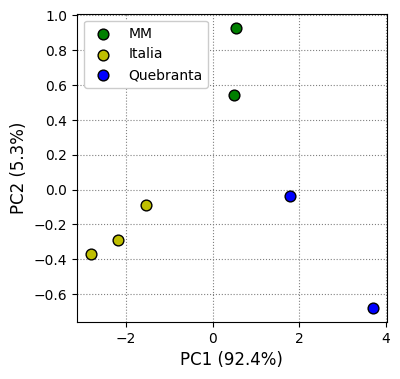

In [1666]:
# Código para graficar PC1 vs. PC2:
#=================================
fig = plt.figure(figsize = (4,4), dpi=100)

ax = fig.add_subplot(1,1,1) 

ax.set_xlabel('PC1 (92.4%)', fontsize = 12, color='k')
ax.set_ylabel('PC2 (5.3%)', fontsize = 12, color='k')
ax.set_title('', fontsize = 16, fontweight='bold', color='k')
ax.set(facecolor = "white")
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dotted')
ax.xaxis.grid(color='gray', linestyle='dotted')

Labels=['MM','Italia','Quebranta']
colors = ['green', 'y', 'b']
for Labels, color in zip(Labels,colors):
    indicesToKeep = finalDf['Label'] == Labels
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 60
               , edgecolors='k'
               , label=str(u))

ax.legend(['MM','Italia','Quebranta'],framealpha=1, frameon=True, loc='upper left')

# Gráfica PC1 vs. PC2:
#====================

## Resultado PCA:
Tras realizar un análisis de primeras componentes con las señales identificadas como propias de cada Pisco, se obtuvo una gráfica PC1 vs. PC2, donde cada muestra de un mismo tipo de Pisco se encuentra agrupado en un cuadrante distintivo y donde las muestras correspondientes a la mezcla de los Pisco se localiza aproximadamente en el cuadrante intermedio. Así, considerando que las señales consideradas como propias de cada Pisco obtenidas mediante Anova, pudieron ser empleadas para graficar y agrupar las muestras en clusters mediante PCA, se verifica que sí pueden ser empleadas como marcadores para la identificación de ambos Pisco.

**Respuesta c)**: Se identificó que las señales que pueden funcionar como marcadores para la identificación de ambas muestras de Pisco son las siguientes: 
   - Señales propias de Quebranta: 0, 2, 18, 42
   - Señal propia de Italia:  12

# d) ¿Qué parámetros y consideraciones tuvo que tomar para poder responder las preguntas “a”, “b”, y “c”?

A continuación, se resumen los parámetros y consideraciones descritos anteriormente para responder las preguntas "a", "b" y "c":

**a) Determina y justifica cuáles son las señales que pueden categorizadas como ruido.**

La primera consideración que se tomó en cuenta fue evaluar si todos los blancos medidos eran significativos. Para ello, se realizó un ANOVA unidireccional para identificar si existen señales que se diferencian entre poblaciones de blancos.  Tras verificar que todas las señales eran no nulas, se realizó una transformación previa de los datos, aplicándoles la función logaritmo en base 10 para asegurar que se cumplan las asunciones de ANOVA (normalidad de residuos y mínima varianza) y se definieron los ensayos a evaluar con la condición de que cada uno cuente con un mínimo de dos poblaciones con dos réplicas distintas. Como resultado de esto último, se definieron cuatro ensayos y se tomó como criterio de análisis que si el valor p era menor a 0.05 ($p<0.05$), se observaban señales que se diferencian significativamente entre poblaciones de blancos, definidas por ensayo. Finalmente, para interpretar los resultados, se comparó el porcentaje de señales con $p<0.05$ por ensayo. Con esto, se concluyó que los únicos blancos que se considerarían como significativos eran aquellos tomados por los grupos 1 y 2 (ver análisis en el inciso a.1.4).

Seguidamente, para identificar las señales que pueden ser categorizadas como ruido, se restaron las señales de los datos provistos con el promedio de los blancos considerados significativos y se realizaron tres filtros consecutivos para identificar aquellas señales que podían ser categorizadas como ruido:
- **Filtro 1:** Se consideraron como ruido aquellas señales con una intensidad menor o igual a tres veces la desviación estándar de los blancos significativos.
- **Filtro 2:** Se consideraron como ruido aquellas señales en las muestras de Pisco Italia y Quebranta que no se encuentran en la mezcla de las muestras (MM).
- **Filtro 3:** Se consideraron como ruido aquellas señales no reproducibles. Para este último filtro, se realizaron pruebas t-student para datos independientes en grupos de la misma muestra, obtenidos con SPMEs distintos. De modo análogo a lo presentado en ANOVA, se realizó una transformación logarítmica a los datos y se evaluó el valor p para identificar si se observaban diferencias significativas de un mismo grupo.

Tras realizar los tres filtros consecutivos, se consideraron como ruido aquellas señales que cumplían con los tres criterios.

**b) ¿Cuáles son las señales comunes para ambas muestras de Pisco?**

Para identificar las señales comunes para ambas muestras de Pisco, se contabilizaron las señales resultantes luego de remover aquellas consideradas como ruido y se identificaron aquellas comunes en ambas muestras de Pisco y en las mezclas de las muestras (MM).

**c) ¿Qué señales funcionan como marcadores para la identificación de las muestras de Pisco?**

Para identificar señales propias de cada Pisco que puedan ser empleadas como marcadores, se realizó un ANOVA unidireccional en tres ensayos con diferentes poblaciones de Pisco y de las mezclas (MM), empleando las transformaciones y criterios de análisis descritos para la pregunta a). Los ensayos evaluados fueron los siguientes:

- **Ensayo 1:** P1 = (MM_X1, MM_X2), P2 = (Italia_12, Italia_21, Italia_32)
- **Ensayo 2:** P1 = (MM_X1, MM_X2), P2 = (Quebranta_11, Quebranta_22)
- **Ensayo 3:** P1 = (Italia_12, Italia_21, Italia_32), P2 = ((Quebranta_11, Quebranta_22)

En cada ensayo, se buscó identificar señales significativamente diferentes en ambas poblaciones. Con esto, el primer ensayo buscó identificar señales propias de Quebranta, el segundo, señales propias de Italia y el tercero buscó verificar señales propias para ambos Pisco. De este modo, se consideraron como señales propias de Quebranta únicamente aquellas con $p>0.05$ en los ensayos 1 y 3, y, como propias de Italia, las que tuvieran $p>0.05$ tanto en el ensayo 2 como en el 3. 

Finalmente, para verificar si las señales obtenidas anteriormente eran, efectivamente, propias de cada Pisco, se realizó un análisis de primeras componentes (PCA), empleando las señales identificadas por ANOVA y se verificó si se lograba obtener una gráfica PC1 vs. PC2, donde cada Pisco se encuentra en una región distintiva y la mezcla de ambos (MM), en el medio de ambas regiones. Cabe notar que se realizó una transformación logarítmica y una estandarización de los datos, antes de proceder con el PCA, pues esta es sensible a ligeras variaciones en varianza.